In [156]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

seed = 3

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# Decide on columns and run pca, save transformed data

In [157]:
df = pd.read_csv('bballref_data/scaled_2000_to_2020.csv', index_col=0)
df.shape

(6541, 71)

In [158]:
sorted(df.columns)

## Cols to drop

['age',
 'and1s_per_min',
 'ast_pct',
 'astd_pts_per_min',
 'avg_dist',
 'blk_pct',
 'bpm',
 'dbpm',
 'def_rtg',
 'drawn_shooting_per_min',
 'drb_pct',
 'fg2_pct',
 'fg2_per_poss',
 'fg2a_per_poss',
 'fg3_heave',
 'fg3_pct',
 'fg3_per_poss',
 'fg3a_heave',
 'fg3a_per_poss',
 'fg_dunk',
 'fg_pct',
 'fg_pct_00_03',
 'fg_pct_03_10',
 'fg_pct_10_16',
 'fg_pct_16_xx',
 'fg_pct_corner3',
 'fg_per_poss',
 'fga_per_poss',
 'fouls_offensive_per_min',
 'fouls_shooting_per_min',
 'ft_pct',
 'ft_per_poss',
 'fta_per_fga_pct',
 'fta_per_poss',
 'g',
 'gs',
 'height',
 'mp',
 'obpm',
 'off_rtg',
 'orb_pct',
 'own_shots_blk_per_min',
 'pct_ast_fg2',
 'pct_ast_fg3',
 'pct_c',
 'pct_fg3a_corner3',
 'pct_fga_00_03',
 'pct_fga_03_10',
 'pct_fga_10_16',
 'pct_fga_16_xx',
 'pct_fga_dunk',
 'pct_fga_fg3a',
 'pct_pf',
 'pct_pg',
 'pct_sf',
 'pct_sg',
 'per',
 'pf_per_poss',
 'plus_minus_net',
 'plus_minus_on',
 'pts_per_poss',
 'stl_pct',
 'tov_bad_pass_per_min',
 'tov_lost_ball_per_min',
 'tov_pct',
 'trb_p

In [165]:
df = pd.read_csv('bballref_data/scaled_2000_to_2020.csv', index_col=0)
drop_cols = ['age',
             'pct_c',
             'pct_pf',
             'pct_pg',
             'pct_sf',
             'pct_sg',
             'year',
             'fg_dunk_per_min',
             'fg3_heave',
             'fg3a_heave',
             'off_rtg',
             'def_rtg',
             'fg_per_poss',  # already have fg2 per poss and fg3 per poss
             'fg_pct',  # already have %s for fg 2s and 3s as well as all the location %s
            ]
df = df.drop(drop_cols, axis=1)
df.shape

(6541, 59)

In [132]:
sorted(df.columns)

['and1s_per_min',
 'ast_pct',
 'astd_pts_per_min',
 'avg_dist',
 'blk_pct',
 'bpm',
 'dbpm',
 'drawn_shooting_per_min',
 'drb_pct',
 'fg2_pct',
 'fg2_per_poss',
 'fg2a_per_poss',
 'fg3_pct',
 'fg3_per_poss',
 'fg3a_per_poss',
 'fg_dunk',
 'fg_pct_00_03',
 'fg_pct_03_10',
 'fg_pct_10_16',
 'fg_pct_16_xx',
 'fg_pct_corner3',
 'fga_per_poss',
 'fouls_offensive_per_min',
 'fouls_shooting_per_min',
 'ft_pct',
 'ft_per_poss',
 'fta_per_fga_pct',
 'fta_per_poss',
 'g',
 'gs',
 'height',
 'mp',
 'obpm',
 'orb_pct',
 'own_shots_blk_per_min',
 'pct_ast_fg2',
 'pct_ast_fg3',
 'pct_fg3a_corner3',
 'pct_fga_00_03',
 'pct_fga_03_10',
 'pct_fga_10_16',
 'pct_fga_16_xx',
 'pct_fga_dunk',
 'pct_fga_fg3a',
 'per',
 'pf_per_poss',
 'plus_minus_net',
 'plus_minus_on',
 'pts_per_poss',
 'stl_pct',
 'tov_bad_pass_per_min',
 'tov_lost_ball_per_min',
 'tov_pct',
 'trb_pct',
 'ts_pct',
 'usg_pct',
 'vorp',
 'weight']

In [161]:
df.to_csv('bballref_data/pre_pca_2000_to_2020.csv')

## SLIM Version

In [171]:
df = pd.read_csv('bballref_data/scaled_2000_to_2020.csv', index_col=0)
drop_cols = ['age',
             'pct_c',
             'pct_pf',
             'pct_pg',
             'pct_sf',
             'pct_sg',
             'year',
             'fg3_heave',
             'fg3a_heave',
             'fg_dunk_per_min',
             'off_rtg',
             'def_rtg',
             'fg_per_poss',  # already have fg2 per poss and fg3 per poss
             'fg_pct',  # already have %s for fg 2s and 3s as well as all the location %s
             
             ### More drop cols for SLIM version
             'fg_pct_00_03',
             'fg_pct_03_10',
             'fg_pct_10_16',
             'fg_pct_16_xx',
             
             'fouls_offensive_per_min',
             'fouls_shooting_per_min',
             'own_shots_blk_per_min',
             'tov_bad_pass_per_min',
             'tov_lost_ball_per_min',
             
#              ## Redundant given attempts and percent?
#              'ft_per_poss',
#              'fg2_per_poss',
#              'fg3_per_poss'
             
             
            ]
df_slim = df.drop(drop_cols, axis=1)
df_slim.to_csv('bballref_data/pre_pca_2000_to_2020_slim.csv')
df_slim.shape

(6541, 48)

## Run pca, see explained variance wrt # principal components

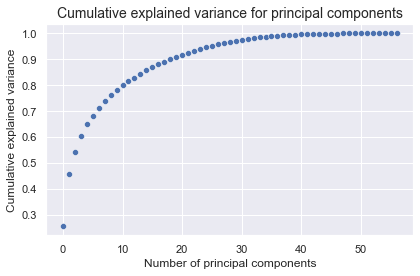

In [166]:
df = pd.read_csv('bballref_data/pre_pca_2000_to_2020.csv', index_col=0)
pca = PCA(random_state=seed)
pca.fit(df)

cumulative_exp_var = pca.explained_variance_ratio_.cumsum()

s = sns.scatterplot(data=cumulative_exp_var)
s.set_title('Cumulative explained variance for principal components', fontsize=14)
s.set_xlabel('Number of principal components')
s.set_ylabel('Cumulative explained variance')
plt.tight_layout()

In [167]:
for i, exp_var in enumerate(cumulative_exp_var):
    print(i, ': ', exp_var)

0 :  0.257486125963337
1 :  0.45610404166085405
2 :  0.541414373434916
3 :  0.6028059354329128
4 :  0.6494670802499678
5 :  0.6819634704868708
6 :  0.7113145726449244
7 :  0.7370630991230842
8 :  0.7605663310779113
9 :  0.7814982988016776
10 :  0.7988167138312569
11 :  0.814995574047926
12 :  0.8292028475069194
13 :  0.8431439057177419
14 :  0.8568917444242766
15 :  0.8691122816537336
16 :  0.8805371888879234
17 :  0.890424228746446
18 :  0.8997148187145452
19 :  0.9088211790483884
20 :  0.9174169602880036
21 :  0.9253460392491354
22 :  0.9329987748562975
23 :  0.9402613612011075
24 :  0.9465368093009953
25 :  0.9525425304970538
26 :  0.9577022937174302
27 :  0.9625057364031705
28 :  0.9669622515400031
29 :  0.97120404846576
30 :  0.9750593129691445
31 :  0.9784655846923453
32 :  0.9814181716199654
33 :  0.9842161397990662
34 :  0.986786606292088
35 :  0.9885833258625812
36 :  0.9902471382701659
37 :  0.9917833730820466
38 :  0.993176431924944
39 :  0.9944501620157871
40 :  0.995514731

### Thresholds
- 90% : 19
- 95% : 25
- 99% : 37
- 99.9% : 48

## Run pca with 99% var

In [164]:
pca = PCA(0.99)
df = pd.read_csv('bballref_data/pre_pca_2000_to_2020.csv', index_col=0)
pca_data = pca.fit_transform(df)
print(pca.n_components_)
df_pca = pd.DataFrame(pca_data, index=df.index, columns=[f'pc_{n}' for n in range(pca.n_components_)])
df_pca.to_csv('bballref_data/pca99_2000_to_2020.csv')

37


## SLIM PCA Version

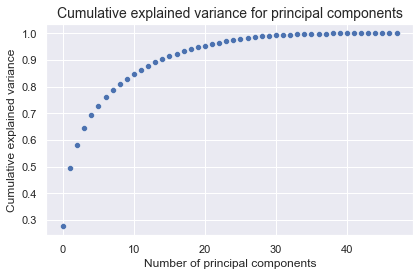

In [172]:
df_slim = pd.read_csv('bballref_data/pre_pca_2000_to_2020_slim.csv', index_col=0)
pca = PCA(random_state=seed)
pca.fit(df_slim)

cumulative_exp_var = pca.explained_variance_ratio_.cumsum()

s = sns.scatterplot(data=cumulative_exp_var)
s.set_title('Cumulative explained variance for principal components', fontsize=14)
s.set_xlabel('Number of principal components')
s.set_ylabel('Cumulative explained variance')
plt.tight_layout()

In [173]:
for i, exp_var in enumerate(cumulative_exp_var):
    print(i, ': ', exp_var)

0 :  0.27851231617204725
1 :  0.49377700247055
2 :  0.5815418125115442
3 :  0.6459363389845167
4 :  0.6948457748705348
5 :  0.7284963198416179
6 :  0.7602955569169159
7 :  0.7866408850932448
8 :  0.810561811418597
9 :  0.8289215022740991
10 :  0.8467820883936018
11 :  0.8630380097831385
12 :  0.8776953797650797
13 :  0.8919088318718574
14 :  0.9030445511825936
15 :  0.9138352397731149
16 :  0.923240265723565
17 :  0.932218230879953
18 :  0.9401965328287977
19 :  0.9474457886852218
20 :  0.9541411024209631
21 :  0.9599358094925683
22 :  0.965349952988223
23 :  0.9705365637242873
24 :  0.9751323489613596
25 :  0.9793196124603605
26 :  0.9830786598796539
27 :  0.9863851467523891
28 :  0.9889161690781391
29 :  0.9909567428495759
30 :  0.9927333954346508
31 :  0.9943544331028698
32 :  0.9956143568138995
33 :  0.996532128335918
34 :  0.99729452780196
35 :  0.9980145917523319
36 :  0.9986456456241537
37 :  0.999117208924199
38 :  0.9994608007885627
39 :  0.9996853631991882
40 :  0.99979783338

In [174]:
pca = PCA(0.99)
df = pd.read_csv('bballref_data/pre_pca_2000_to_2020_slim.csv', index_col=0)
pca_data = pca.fit_transform(df)
print(pca.n_components_)
df_pca = pd.DataFrame(pca_data, index=df.index, columns=[f'pc_{n}' for n in range(pca.n_components_)])
df_pca.to_csv('bballref_data/pca99_2000_to_2020_slim.csv')

30


# Worksheet below

## Add back in Charges drawn as data starts in 2000

In [14]:
df_master = pd.read_csv('bballref_data/master_raw_nba_data.csv', index_col=0)
df_master.shape

(11162, 92)

In [24]:
df_master_2000 = df_master.loc[df.index, :]
df_master_2000.shape

df = df.merge(df_master_2000['drawn_offensive'], left_index=True, right_index=True)

(6542, 92)

In [26]:
df.shape
df['drawn_offensive'].isna().sum()

(6542, 66)

1486